In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster, GroupedLayerControl
import ast
import seaborn as sns
from scipy.optimize import curve_fit

from data_utilities import *

## Regression

In [187]:
services_filter: list = [10,11,14,15]

data = pd.DataFrame()
if len(services_filter) != 0:
    for i in range(len(services_filter)):
        if type(services_filter[i]) != str:
            services_filter[i] = services[services_filter[i]]
    for i in services_filter:
        # data = DF[DF["Service Area and Request"].isin(services_filter)]
        data = DF[DF["Service Request"].isin(services_filter)]
else:
    data = DF

census_df = pd.read_csv("./assets/census_2016_new.csv")
census_df = census_df[census_df["Boundary Type"] == "Neighbourhood"]

# combined_df = pd.merge(DF, census_df, left_on="Neighbourhood", right_on="Boundary Name", how="inner")
combined_df = data.groupby("Neighbourhood").size().sort_values().to_frame().rename(columns={0: "Count"})
combined_df = pd.merge(combined_df, census_df, left_on="Neighbourhood", right_on="Boundary Name", how="inner")
combined_df = combined_df[combined_df['Population 2016'] != 0]

In [188]:
combined_df['Average Household Income'] = combined_df['Average and Median Household Income'].str.strip("[]").str.split(', ').str[0]
combined_df['Median Household Income'] = combined_df['Average and Median Household Income'].str.strip("[]").str.split(', ').str[1]

In [189]:
combined_df['Average Household Income']= combined_df['Average Household Income'].astype(int)
combined_df['Median Household Income']= combined_df['Median Household Income'].astype(int)

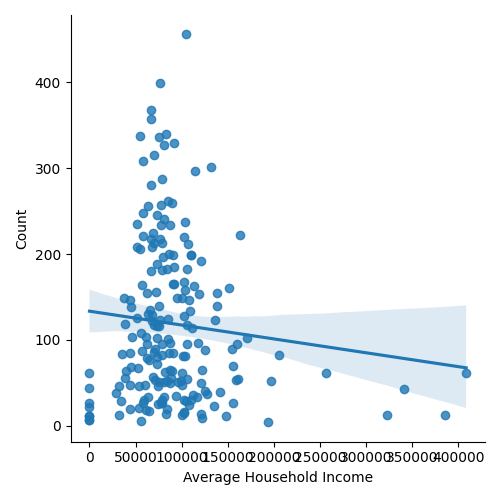

In [190]:
# combined_df.plot(kind="scatter", x="Average Household Income", y="Count")
sns.lmplot(x="Average Household Income", y="Count", data=combined_df)
plt.show()

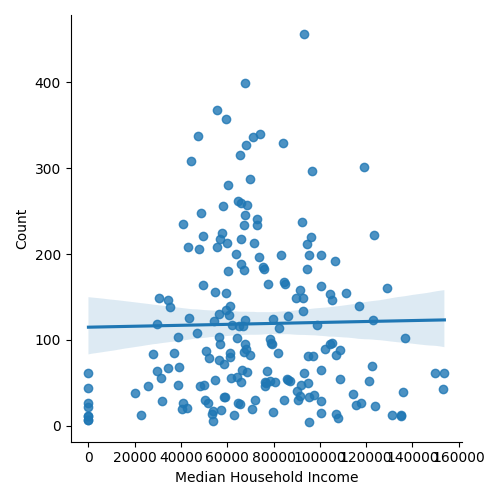

In [191]:
# combined_df.plot(kind="scatter", x="Median Household Income", y="Count")
sns.lmplot(x="Median Household Income", y="Count", data=combined_df)
plt.show()

Income doesn't seem to be a good predictor of the number of events.

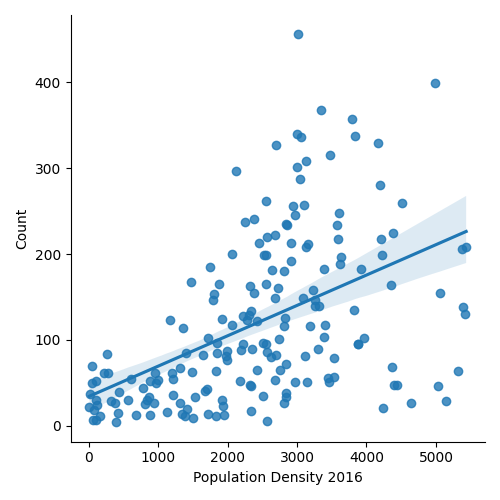

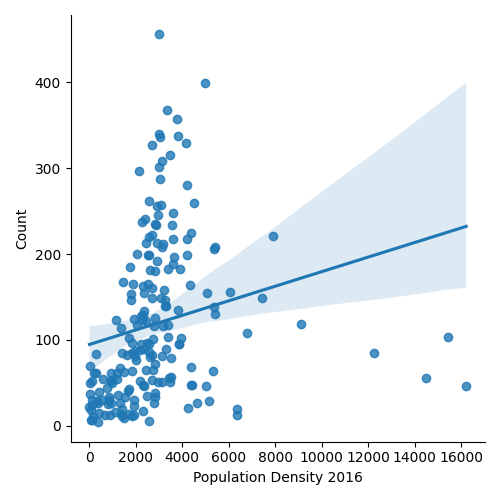

In [192]:
sns.lmplot(x="Population Density 2016", y="Count", data=combined_df)
sns.lmplot(x="Population Density 2016", y="Count", data=combined_df[combined_df["Population Density 2016"] < 6000])
plt.show()

There's a positive correlation between population density and number of events.

In [193]:
combined_df[combined_df["Population Density 2016"] > 6000]

,Count,Boundary Type,Boundary Name,Population 2016,Population Density 2016,Year opened,Aboriginal,Aboriginal Percent,Visible Minorities Names,Visible Minorities Numbers,...,Own vs Rent Percent,Bad Dwelling,Bad Dwelling Percent,Average and Median Household Income,Commuting Method,Commuting Method Percent,LIM-AT,LICO-AT,Average Household Income,Median Household Income
32,13,Neighbourhood,China Town,420,6364.311366,1986,0,0.000000,"['Chinese', 'South Asian', 'Filipino']","[310, 30, 25]",...,"[0, 1]",15,0.081081,"[32142, 22886]","[35, 85]","[0.2916666666666667, 0.7083333333333334]",0.571429,0.321429,32142,22886
44,20,Neighbourhood,Portage-Ellice,1075,6343.268170,2001,120,0.111628,"['South Asian', 'Chinese', 'Filipino']","[110, 90, 70]",...,"[0.058394160583941604, 0.9416058394160584]",35,0.051095,"[44469, 40481]","[115, 295]","[0.2804878048780488, 0.7195121951219512]",0.242991,0.228972,44469,40481
83,46,Neighbourhood,Central Park,3775,16221.907095,2001,675,0.178808,"['Black', 'Filipino', 'South Asian']","[1065, 850, 185]",...,"[0.11023622047244094, 0.889763779527559]",190,0.099738,"[32248, 25574]","[435, 930]","[0.31868131868131866, 0.6813186813186812]",0.543046,0.475497,32248,25574
103,56,Neighbourhood,Roslyn,4550,14491.045808,1971,235,0.051648,"['South Asian', 'Black', 'Chinese']","[135, 90, 90]",...,"[0.3697068403908795, 0.6302931596091205]",225,0.073290,"[88912, 61605]","[1415, 990]","[0.5883575883575883, 0.41164241164241167]",0.135165,0.119780,88912,61605
126,85,Neighbourhood,Alpine Place,3895,12236.883443,1971,475,0.121951,"['Black', 'South Asian', 'Filipino']","[630, 260, 145]",...,"[0.03991130820399113, 0.9600886917960089]",160,0.070953,"[44114, 37015]","[855, 575]","[0.5979020979020979, 0.40209790209790214]",0.311938,0.243902,44114,37015
145,104,Neighbourhood,Broadway-Assiniboine,5270,15452.189109,1981,720,0.136622,"['Black', 'Filipino', 'South Asian']","[505, 340, 205]",...,"[0.06721536351165981, 0.9327846364883402]",345,0.094521,"[45656, 38847]","[930, 2135]","[0.3034257748776509, 0.6965742251223491]",0.313390,0.275404,45656,38847
146,108,Neighbourhood,St. Matthews,5770,6774.256417,1971,1110,0.192374,"['Filipino', 'Black', 'Southeast Asian']","[1465, 530, 300]",...,"[0.5132743362831859, 0.48672566371681414]",395,0.174779,"[55625, 47077]","[1330, 1340]","[0.49812734082397003, 0.50187265917603]",0.298352,0.242845,55625,47077
153,119,Neighbourhood,Spence,4415,9125.954711,1971,1210,0.274066,"['Black', 'Filipino', 'Chinese']","[730, 705, 185]",...,"[0.1745635910224439, 0.8254364089775561]",245,0.122195,"[38787, 29675]","[530, 1035]","[0.33865814696485624, 0.6613418530351437]",0.524349,0.462061,38787,29675
171,149,Neighbourhood,West Broadway,5010,7429.442540,1971,1160,0.231537,"['Black', 'Filipino', 'Arab']","[570, 135, 135]",...,"[0.08445945945945946, 0.9155405405405406]",405,0.136824,"[37279, 30527]","[910, 1710]","[0.3473282442748092, 0.6526717557251908]",0.466068,0.430140,37279,30527
175,156,Neighbourhood,Mcmillan,3445,6074.487856,1971,375,0.108853,"['South Asian', 'Filipino', 'Black']","[95, 70, 60]",...,"[0.31592039800995025, 0.6840796019900498]",265,0.131841,"[72318, 54548]","[1250, 1120]","[0.5274261603375527, 0.4725738396624472]",0.172714,0.200290,72318,54548


There are some outliers. Notice these neighbourhoods have a high population density but low number of events because these neighbourhoods have a lot of apartment buildings instead of houses. These apartment buildings have their own caretaking service, which overlaps with city's service and is not included in the data.

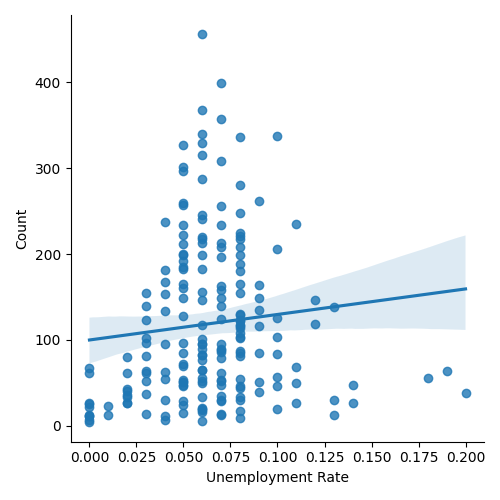

In [194]:
# combined_df.plot(kind="scatter", x="Unemployment Rate", y="Count")
sns.lmplot(x="Unemployment Rate", y="Count", data=combined_df)
plt.show()

There's a positive correlation between the unemployment rate and the number of events.

In [195]:
combined_df[combined_df["Unemployment Rate"] > 0.1]

,Count,Boundary Type,Boundary Name,Population 2016,Population Density 2016,Year opened,Aboriginal,Aboriginal Percent,Visible Minorities Names,Visible Minorities Numbers,...,Own vs Rent Percent,Bad Dwelling,Bad Dwelling Percent,Average and Median Household Income,Commuting Method,Commuting Method Percent,LIM-AT,LICO-AT,Average Household Income,Median Household Income
32,13,Neighbourhood,China Town,420,6364.311366,1986,0,0.000000,"['Chinese', 'South Asian', 'Filipino']","[310, 30, 25]",...,"[0, 1]",15,0.081081,"[32142, 22886]","[35, 85]","[0.2916666666666667, 0.7083333333333334]",0.571429,0.321429,32142,22886
56,27,Neighbourhood,Edgeland,1255,4638.596076,1971,160,0.127490,"['Black', 'West Asian', 'Visible minority not ...","[125, 60, 55]",...,"[0.4126984126984127, 0.5873015873015873]",60,0.096000,"[79064, 51763]","[215, 105]","[0.671875, 0.328125]",0.438247,0.306773,79064,51763
57,27,Neighbourhood,St. John's Park,530,1318.037467,1971,150,0.283019,"['Black', 'Southeast Asian', 'Filipino']","[45, 10, 0]",...,"[0.5686274509803921, 0.43137254901960786]",25,0.100000,"[58337, 40872]","[160, 75]","[0.6808510638297872, 0.3191489361702128]",0.452830,0.386792,58337,40872
64,30,Neighbourhood,South Point Douglas,390,562.596832,1971,205,0.525641,"['Black', 'Southeast Asian', 'Filipino']","[25, 10, 0]",...,"[0.11764705882352941, 0.8823529411764706]",10,0.058824,"[59433, 50578]","[90, 65]","[0.5806451612903226, 0.41935483870967744]",0.397436,0.320513,59433,50578
78,38,Neighbourhood,Lord Selkirk Park,1520,2843.327067,1971,975,0.641447,"['Black', 'Filipino', 'Chinese']","[175, 10, 10]",...,"[0.09448818897637795, 0.905511811023622]",50,0.078125,"[28570, 20047]","[90, 145]","[0.3829787234042553, 0.6170212765957447]",0.704918,0.560656,28570,20047
87,47,Neighbourhood,Pembina Strip,3175,4444.313798,1971,150,0.047244,"['South Asian', 'Chinese', 'Black']","[635, 390, 230]",...,"[0.19287833827893175, 0.8071216617210683]",80,0.047478,"[43921, 38914]","[760, 660]","[0.5352112676056338, 0.46478873239436613]",0.382677,0.324409,43921,38914
91,50,Neighbourhood,Rosser-Old Kildonan,680,42.511717,1971,50,0.073529,"['Filipino', 'South Asian', 'Latin American']","[305, 110, 15]",...,"[0.9487179487179487, 0.05128205128205128]",0,0.000000,"[121020, 94781]","[290, 85]","[0.7733333333333333, 0.22666666666666668]",0.125926,0.125926,121020,94781
102,56,Neighbourhood,Dufferin,2255,3452.103027,1971,935,0.414634,"['Filipino', 'Black', 'Arab']","[370, 85, 60]",...,"[0.30952380952380953, 0.6904761904761905]",110,0.130952,"[38693, 31376]","[260, 315]","[0.45217391304347826, 0.5478260869565217]",0.547672,0.467849,38693,31376
111,64,Neighbourhood,Centennial,2830,5312.149806,1971,955,0.337456,"['Black', 'Filipino', 'Southeast Asian']","[420, 365, 190]",...,"[0.20772946859903382, 0.7922705314009661]",180,0.175610,"[39134, 29635]","[270, 420]","[0.391304347826087, 0.6086956521739131]",0.592920,0.467257,39134,29635
115,68,Neighbourhood,Montcalm,4940,4371.190141,1971,400,0.080972,"['Chinese', 'South Asian', 'Black']","[830, 790, 725]",...,"[0.09898989898989899, 0.901010101010101]",140,0.056566,"[44955, 39030]","[1075, 1040]","[0.508274231678487, 0.49172576832151305]",0.403242,0.362715,44955,39030


For neighbourhoods with unemployment rate > 10%, the education level is much lower. For example, both China Town and Lord Selkirk Park have more than half of people doesn't have a high school diploma or other higher education.

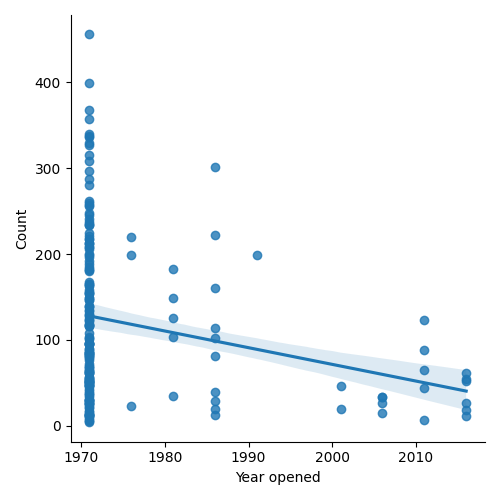

In [196]:
# combined_df.plot(kind="scatter", x="Year opened", y="Count")
sns.lmplot(x="Year opened", y="Count", data=combined_df)
plt.show()

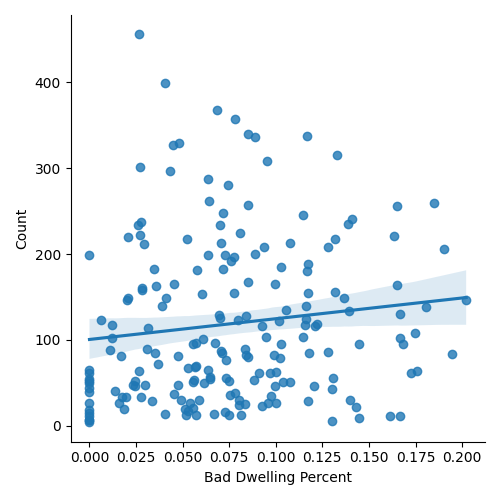

In [197]:
# combined_df.plot(kind="scatter", x="Bad Dwelling Percent", y="Count")
sns.lmplot(x="Bad Dwelling Percent", y="Count", data=combined_df)
plt.show()

There is a positive correlation between the proportion of bad dwelling and the number of events.

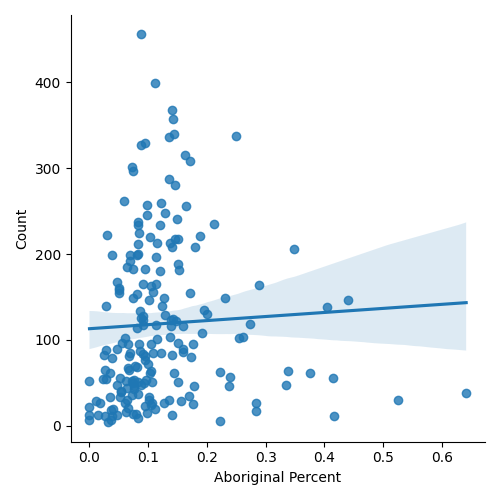

In [198]:
# combined_df.plot(kind="scatter", x="Aboriginal Percent", y="Count")
sns.lmplot(x="Aboriginal Percent", y="Count", data=combined_df)
plt.show()

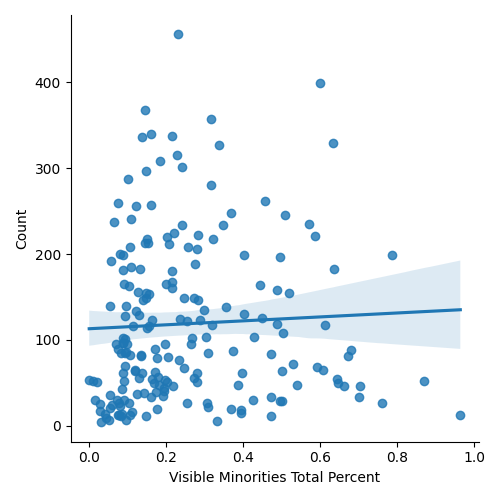

In [199]:
# combined_df.plot(kind="scatter", x="Visible Minorities Total Percent", y="Count")
sns.lmplot(x="Visible Minorities Total Percent", y="Count", data=combined_df)
plt.show()

In [200]:
combined_df['No Education'] = combined_df['Education Percent'].str.strip("[]").str.split(', ').str[0]
combined_df['High School Education'] = combined_df['Education Percent'].str.strip("[]").str.split(', ').str[1]
combined_df['Undergraduate Education'] = combined_df['Education Percent'].str.strip("[]").str.split(', ').str[2]

combined_df['No Education'] = combined_df['No Education'].astype(float)
combined_df['High School Education'] = combined_df['High School Education'].astype(float)
combined_df['Undergraduate Education'] = combined_df['Undergraduate Education'].astype(float)

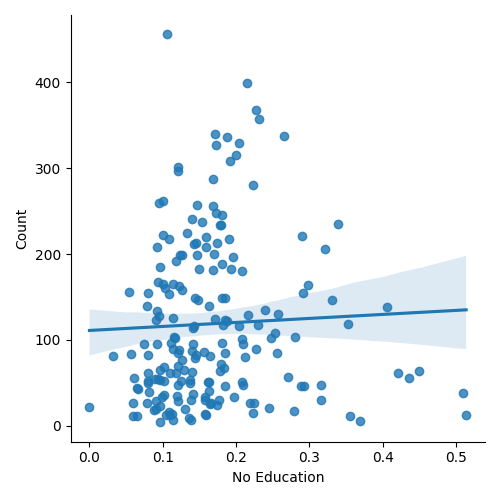

In [201]:
# combined_df.plot(kind="scatter", x="No Education", y="Count")
sns.lmplot(x="No Education", y="Count", data=combined_df)
plt.show()

This confirms what we had before, poor education have a positive correlation with the number of events.

In [202]:
combined_df['Non Citizenship Percent'] = combined_df['Citizenship Percent'].str.strip("[]").str.split(', ').str[1].astype(float)

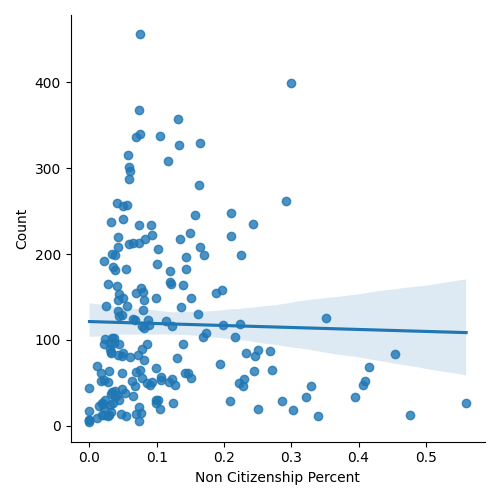

In [203]:
# combined_df.plot(kind="scatter", x="Non Citizenship Percent", y="Count")
sns.lmplot(x="Non Citizenship Percent", y="Count", data=combined_df)
plt.show()

In [204]:
combined_df['House'] = combined_df['Household Type'].str.strip("[]").str.split(', ').str[0].astype(int)
combined_df['Apartment'] = combined_df['Household Type'].str.strip("[]").str.split(', ').str[1].astype(int)
combined_df['Other'] = combined_df['Household Type'].str.strip("[]").str.split(', ').str[2].astype(int)

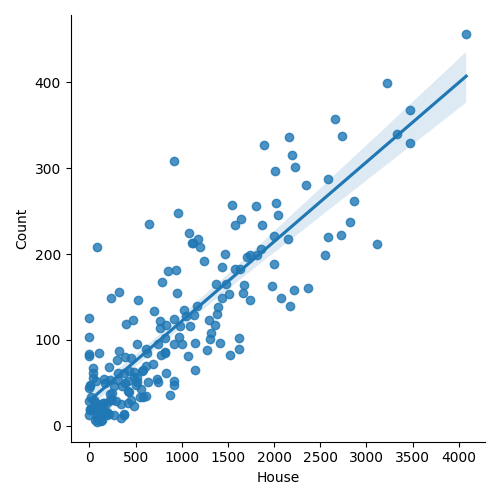

In [205]:
# combined_df.plot(kind="scatter", x="House", y="Count")
sns.lmplot(x="House", y="Count", data=combined_df)
plt.show()

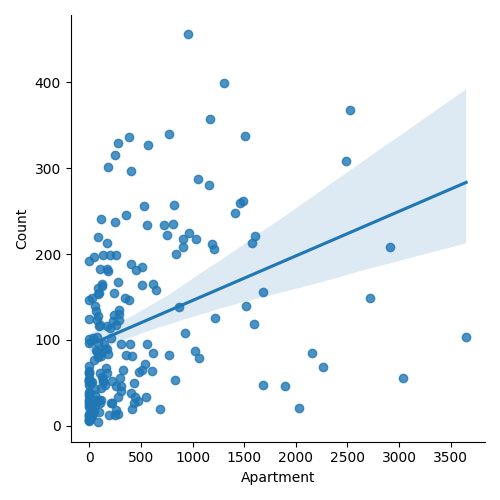

In [206]:
# combined_df.plot(kind="scatter", x="Apartment", y="Count")
sns.lmplot(x="Apartment", y="Count", data=combined_df)
plt.show()

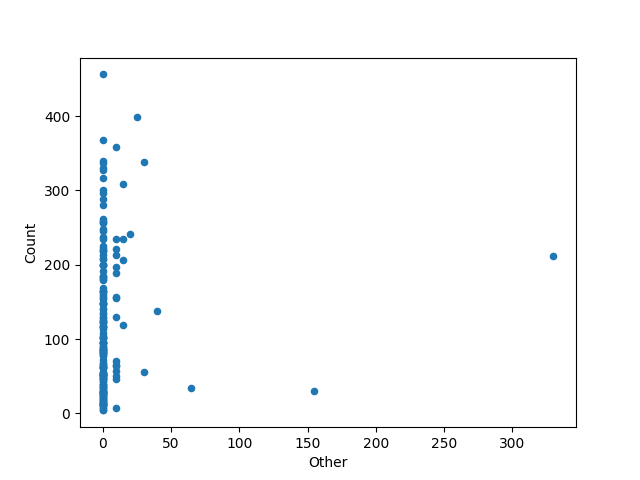

In [207]:
combined_df.plot(kind="scatter", x="Other", y="Count")
plt.show()

In [208]:
combined_df['Rent Percent'] = combined_df['Own vs Rent Percent'].str.strip("[]").str.split(', ').str[1].astype(float)

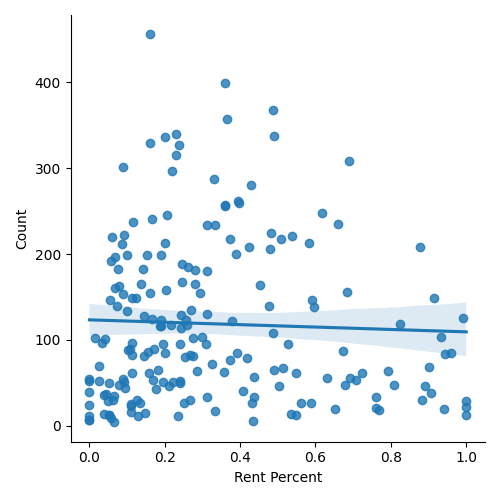

In [209]:
# combined_df.plot(kind="scatter", x="Rent Percent", y="Count")
sns.lmplot(x="Rent Percent", y="Count", data=combined_df)
plt.show()

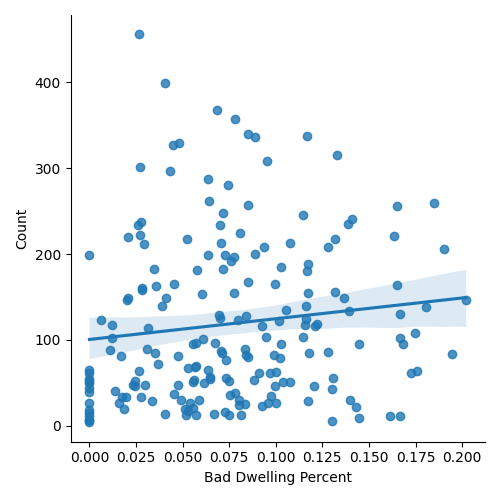

In [210]:
# combined_df.plot(kind="scatter", x="Bad Dwelling Percent", y="Count")
sns.lmplot(x="Bad Dwelling Percent", y="Count", data=combined_df)
plt.show()

In [211]:
combined_df['Private Commuting Percent'] = combined_df['Commuting Method Percent'].str.strip("[]").str.split(', ').str[0].astype(float)
combined_df['Public Commuting Percent'] = combined_df['Commuting Method Percent'].str.strip("[]").str.split(', ').str[1].astype(float)

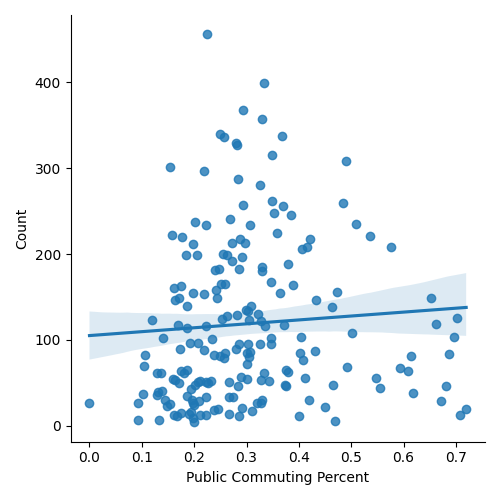

In [212]:
# combined_df.plot(kind="scatter", x="Public Commuting Percent", y="Count")
sns.lmplot(x="Public Commuting Percent", y="Count", data=combined_df)
plt.show()

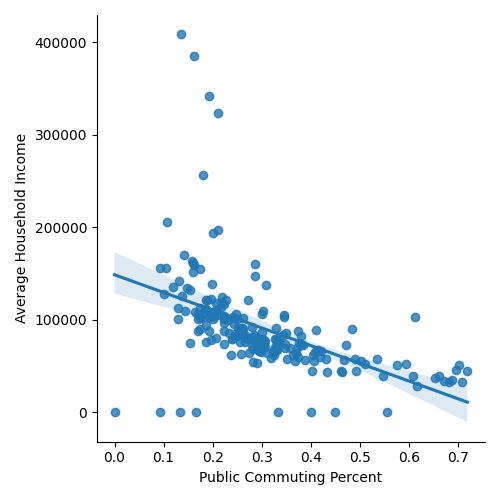

In [213]:
# combined_df.plot(kind="scatter", x="Public Commuting Percent", y="Average Household Income")
sns.lmplot(x="Public Commuting Percent", y="Average Household Income", data=combined_df)
plt.show()

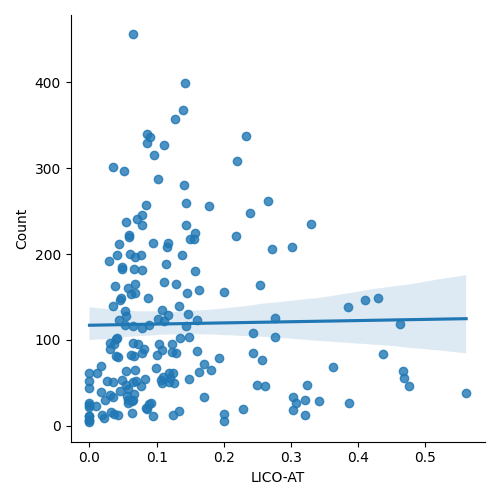

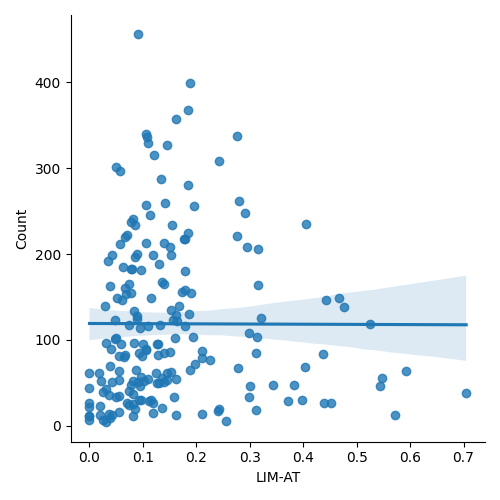

In [214]:
sns.lmplot(x="LIM-AT", y="Count", data=combined_df)
sns.lmplot(x="LICO-AT", y="Count", data=combined_df)
plt.show()

In [215]:
combined_df[combined_df["LIM-AT"] > 0.2][combined_df["Count"] < 500]

/var/folders/p_/999v4cl56z9dl2jlxqtv8c5r0000gn/T/ipykernel_11096/2263910173.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  combined_df[combined_df["LIM-AT"] > 0.2][combined_df["Count"] < 500]


,Count,Boundary Type,Boundary Name,Population 2016,Population Density 2016,Year opened,Aboriginal,Aboriginal Percent,Visible Minorities Names,Visible Minorities Numbers,...,No Education,High School Education,Undergraduate Education,Non Citizenship Percent,House,Apartment,Other,Rent Percent,Private Commuting Percent,Public Commuting Percent
9,5,Neighbourhood,Kensington,270,2563.493947,1971,60,0.222222,"['Filipino', 'South Asian', 'Black']","[50, 30, 10]",...,0.369565,0.304348,0.326087,0.074074,120,0,0,0.434783,0.531250,0.468750
32,13,Neighbourhood,China Town,420,6364.311366,1986,0,0.000000,"['Chinese', 'South Asian', 'Filipino']","[310, 30, 25]",...,0.513889,0.291667,0.194444,0.476190,0,190,0,1.000000,0.291667,0.708333
33,14,Neighbourhood,Vialoux,950,1720.394278,1971,75,0.078947,"['Filipino', 'South Asian', 'Arab']","[15, 15, 15]",...,0.157576,0.303030,0.539394,0.068421,215,280,0,0.535354,0.733333,0.266667
38,17,Neighbourhood,Dufresne,370,2334.885717,1971,105,0.283784,"['Black', 'Filipino', 'South Asian']","[10, 0, 0]",...,0.279412,0.294118,0.426471,0.000000,150,45,0,0.333333,0.688889,0.311111
41,18,Neighbourhood,Tuxedo Industrial,545,82.194648,2016,20,0.036697,"['South Asian', 'Arab', 'Filipino']","[40, 35, 30]",...,0.087912,0.285714,0.626374,0.302752,10,260,0,0.769231,0.761905,0.238095
44,20,Neighbourhood,Portage-Ellice,1075,6343.268170,2001,120,0.111628,"['South Asian', 'Chinese', 'Filipino']","[110, 90, 70]",...,0.090909,0.292929,0.616162,0.251163,10,685,0,0.941606,0.280488,0.719512
56,27,Neighbourhood,Edgeland,1255,4638.596076,1971,160,0.127490,"['Black', 'West Asian', 'Visible minority not ...","[125, 60, 55]",...,0.224490,0.341837,0.433673,0.099602,195,430,0,0.587302,0.671875,0.328125
57,27,Neighbourhood,St. John's Park,530,1318.037467,1971,150,0.283019,"['Black', 'Southeast Asian', 'Filipino']","[45, 10, 0]",...,0.219512,0.341463,0.439024,0.019048,145,105,0,0.431373,0.680851,0.319149
60,29,Neighbourhood,Colony,645,5140.753021,1986,100,0.155039,"['Black', 'Filipino', 'South Asian']","[95, 90, 45]",...,0.090164,0.278689,0.631148,0.286822,0,470,0,1.000000,0.329114,0.670886
64,30,Neighbourhood,South Point Douglas,390,562.596832,1971,205,0.525641,"['Black', 'Southeast Asian', 'Filipino']","[25, 10, 0]",...,0.315789,0.280702,0.403509,0.101266,50,115,0,0.882353,0.580645,0.419355


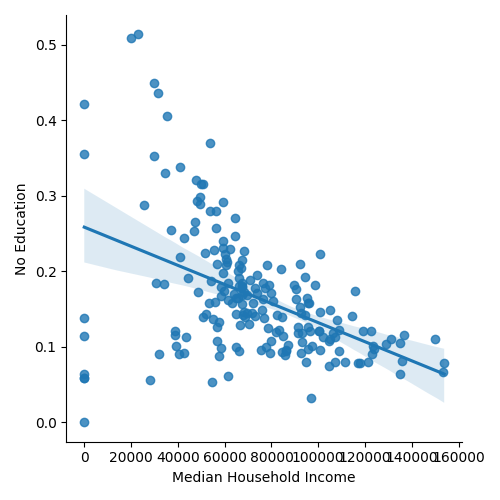

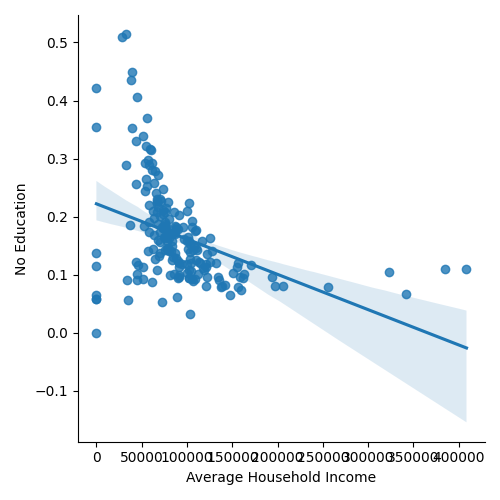

In [216]:
sns.lmplot(x="Average Household Income", y="No Education", data=combined_df)
sns.lmplot(x="Median Household Income", y="No Education", data=combined_df)
plt.show()